In [28]:
##Option1 is the script where we divided the training set into train and validation set


# Loading required libraries:
## Sklearn modules
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 

###modules for preprocessing, training, test data and validation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
## Classification
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA

##PLotting modules
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text
import numpy as np
import seaborn as sns
import plotly.offline as pyo 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from matplotlib.colors import ListedColormap

In [29]:
#Lodaing data
data = pd.read_csv("healthcare-dataset-stroke-data.csv")
data.head() 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [30]:
## data shape
row, columns = data.shape 
print ('Number of rows', row)
print ('Number of columns', columns)

Number of rows 5110
Number of columns 12


In [31]:
# Data descriptions 
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


In [32]:
# Data descriptions 
print(data.describe().T)

                    count          mean           std    min        25%  \
id                 5110.0  36517.829354  21161.721625  67.00  17741.250   
age                5110.0     43.226614     22.612647   0.08     25.000   
hypertension       5110.0      0.097456      0.296607   0.00      0.000   
heart_disease      5110.0      0.054012      0.226063   0.00      0.000   
avg_glucose_level  5110.0    106.147677     45.283560  55.12     77.245   
bmi                4909.0     28.893237      7.854067  10.30     23.500   
stroke             5110.0      0.048728      0.215320   0.00      0.000   

                         50%       75%       max  
id                 36932.000  54682.00  72940.00  
age                   45.000     61.00     82.00  
hypertension           0.000      0.00      1.00  
heart_disease          0.000      0.00      1.00  
avg_glucose_level     91.885    114.09    271.74  
bmi                   28.100     33.10     97.60  
stroke                 0.000      0.00    

In [33]:
##copying data
data_copy= data.copy(deep=True)

In [34]:
# Coulumn with categorical values
data_size=data_copy.groupby('gender').size()
print ('Column name', 'gender', ':', data_size)

print ('*'*4)
data_size=data_copy.groupby('heart_disease').size()
print ('Column name', 'heart_disease', ':', data_size)

print ('*'*4)
data_size=data_copy.groupby('ever_married').size()
print ('Column name', 'ever_married', ':', data_size)

print ('*'*4)
data_size=data_copy.groupby('smoking_status').size()
print ('Column name', 'smoking_status', ':', data_size)


print ('*'*4)
data_size=data_copy.groupby('work_type').size()
print ('Column name', 'work_type', ':', data_size)

print ('*'*4)
data_size=data_copy.groupby('Residence_type').size()
print ('Column name', 'Residence_type', ':', data_size)

Column name gender : gender
Female    2994
Male      2115
Other        1
dtype: int64
****
Column name heart_disease : heart_disease
0    4834
1     276
dtype: int64
****
Column name ever_married : ever_married
No     1757
Yes    3353
dtype: int64
****
Column name smoking_status : smoking_status
Unknown            1544
formerly smoked     885
never smoked       1892
smokes              789
dtype: int64
****
Column name work_type : work_type
Govt_job          657
Never_worked       22
Private          2925
Self-employed     819
children          687
dtype: int64
****
Column name Residence_type : Residence_type
Rural    2514
Urban    2596
dtype: int64


In [35]:
#removing row where the value is 'Other' for gender
data_copy.drop(data_copy[data_copy.gender == 'Other'].index, inplace=True)

In [36]:
# Coulumn with categorical values
data_size=data_copy.groupby('gender').size()
print ('Column name', 'gender', ':', data_size)

Column name gender : gender
Female    2994
Male      2115
dtype: int64


In [37]:
#missing value
data_copy.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [38]:
#Filling missing values with mean for bmi
data_copy.bmi.fillna(data_copy.bmi.mean(), inplace=True)


In [39]:
#missing value after imputation
data_copy.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [40]:
#Encoding selected columns
##Gender column
gender_dict={'Male':1, 'Female':2}
data_copy.replace(gender_dict, inplace=True)
data_copy.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,Yes,Private,Urban,228.69,36.60000,formerly smoked,1
1,51676,2,61.0,0,0,Yes,Self-employed,Rural,202.21,28.89456,never smoked,1
2,31112,1,80.0,0,1,Yes,Private,Rural,105.92,32.50000,never smoked,1
3,60182,2,49.0,0,0,Yes,Private,Urban,171.23,34.40000,smokes,1
4,1665,2,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00000,never smoked,1


In [41]:
#Encoding selected columns
##ever_married
ever_married_dict={'No':0, 'Yes':1}
data_copy.replace(ever_married_dict, inplace=True)
data_copy.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,Private,Urban,228.69,36.60000,formerly smoked,1
1,51676,2,61.0,0,0,1,Self-employed,Rural,202.21,28.89456,never smoked,1
2,31112,1,80.0,0,1,1,Private,Rural,105.92,32.50000,never smoked,1
3,60182,2,49.0,0,0,1,Private,Urban,171.23,34.40000,smokes,1
4,1665,2,79.0,1,0,1,Self-employed,Rural,174.12,24.00000,never smoked,1


In [42]:
#Encoding selected columns
##work_type
work_type_dict={'Govt_job':1, 'Private':2, 'Never_worked':3, 'Self-employed':4, 'children':5}
data_copy.replace(work_type_dict, inplace=True)
data_copy.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,Urban,228.69,36.60000,formerly smoked,1
1,51676,2,61.0,0,0,1,4,Rural,202.21,28.89456,never smoked,1
2,31112,1,80.0,0,1,1,2,Rural,105.92,32.50000,never smoked,1
3,60182,2,49.0,0,0,1,2,Urban,171.23,34.40000,smokes,1
4,1665,2,79.0,1,0,1,4,Rural,174.12,24.00000,never smoked,1


In [43]:
#Encoding selected columns
##work_type
smoking_status_dict={'Unknown':1, 'formerly smoked':2, 'never smoked':3, 'smokes':4}
data_copy.replace(smoking_status_dict, inplace=True)
data_copy.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,Urban,228.69,36.60000,2,1
1,51676,2,61.0,0,0,1,4,Rural,202.21,28.89456,3,1
2,31112,1,80.0,0,1,1,2,Rural,105.92,32.50000,3,1
3,60182,2,49.0,0,0,1,2,Urban,171.23,34.40000,4,1
4,1665,2,79.0,1,0,1,4,Rural,174.12,24.00000,3,1


In [44]:
#Encoding selected columns
##work_type
Residence_type_dict={'Rural':1, 'Urban':2}
data_copy.replace(Residence_type_dict, inplace=True)
data_copy.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,2,228.69,36.60000,2,1
1,51676,2,61.0,0,0,1,4,1,202.21,28.89456,3,1
2,31112,1,80.0,0,1,1,2,1,105.92,32.50000,3,1
3,60182,2,49.0,0,0,1,2,2,171.23,34.40000,4,1
4,1665,2,79.0,1,0,1,4,1,174.12,24.00000,3,1


In [45]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   int64  
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   int64  
 6   work_type          5109 non-null   int64  
 7   Residence_type     5109 non-null   int64  
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                5109 non-null   float64
 10  smoking_status     5109 non-null   int64  
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 518.9 KB


In [46]:
# Coulumn with categorical values
data_size=data_copy.groupby('stroke').size()
print ('Column name',  ':', data_size)

Column name : stroke
0    4860
1     249
dtype: int64


In [47]:
data_copy.describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,36513.985516,1.586025,43.229986,0.097475,0.054022,0.656293,2.599726,1.508123,106.140399,28.894560,2.376982,0.048738
std,21162.008804,0.492592,22.613575,0.296633,0.226084,0.474991,1.274750,0.499983,45.285004,7.698235,1.071626,0.215340
min,67.000000,1.000000,0.080000,0.000000,0.000000,0.000000,1.000000,1.000000,55.120000,10.300000,1.000000,0.000000
25%,17740.000000,1.000000,25.000000,0.000000,0.000000,0.000000,2.000000,1.000000,77.240000,23.800000,1.000000,0.000000
50%,36922.000000,2.000000,45.000000,0.000000,0.000000,1.000000,2.000000,2.000000,91.880000,28.400000,3.000000,0.000000
75%,54643.000000,2.000000,61.000000,0.000000,0.000000,1.000000,4.000000,2.000000,114.090000,32.800000,3.000000,0.000000
max,72940.000000,2.000000,82.000000,1.000000,1.000000,1.000000,5.000000,2.000000,271.740000,97.600000,4.000000,1.000000


In [48]:
##droping column 'id'
data_copy.drop(['id'], axis=1, inplace=True)
data_copy.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,2,228.69,36.60000,2,1
1,2,61.0,0,0,1,4,1,202.21,28.89456,3,1
2,1,80.0,0,1,1,2,1,105.92,32.50000,3,1
3,2,49.0,0,0,1,2,2,171.23,34.40000,4,1
4,2,79.0,1,0,1,4,1,174.12,24.00000,3,1


In [49]:
## creating training and test data set
x = data_copy.drop(columns= 'heart_disease')

y= data_copy['heart_disease']

In [50]:
x.columns

Index(['gender', 'age', 'hypertension', 'ever_married', 'work_type',
       'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status',
       'stroke'],
      dtype='object')

In [51]:
#scaling the values using Standard Scalar Library
from sklearn import preprocessing
x=preprocessing.StandardScaler().fit(x).transform(x.astype(float))
print (pd.DataFrame(x, columns=['gender', 'age', 'hypertension', 'ever_married', 'work_type',
       'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status',
       'stroke']).head())

     gender       age  hypertension  ever_married  work_type  Residence_type  \
0 -1.189791  1.051242     -0.328637      0.723678  -0.470512        0.983884   
1  0.840484  0.785889     -0.328637      0.723678   1.098577       -1.016380   
2 -1.189791  1.626174     -0.328637      0.723678  -0.470512       -1.016380   
3  0.840484  0.255182     -0.328637      0.723678  -0.470512        0.983884   
4  0.840484  1.581949      3.042866      0.723678   1.098577       -1.016380   

   avg_glucose_level           bmi  smoking_status    stroke  
0           2.706450  1.001034e+00       -0.351819  4.417926  
1           2.121652  4.615423e-16        0.581434  4.417926  
2          -0.004867  4.683922e-01        0.581434  4.417926  
3           1.437473  7.152261e-01        1.514687  4.417926  
4           1.501297 -6.358651e-01        0.581434  4.417926  


In [52]:
#Spliting test datase as 30%
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0) 
print ('x_train:',len(x_train))
print ('x_test:',len(x_test))
print ('y_train:',len(y_train))
print ('y_test:',len(y_test))

x_train: 3576
x_test: 1533
y_train: 3576
y_test: 1533


[0.9032424142841494, 0.9334444392282053, 0.9418384113421905, 0.9423955056883088, 0.9437929361688809, 0.9440730482136989, 0.9443523778226375, 0.9449110370405146, 0.944631707431576, 0.9443523778226375, 0.9446324898674554, 0.9449118194763939, 0.9449118194763939, 0.944631707431576, 0.944631707431576]
The maximum cross validation score is 0.9449118194763939 at K = 23
The minimum error rate is 0.05508818052360609 at K = 23


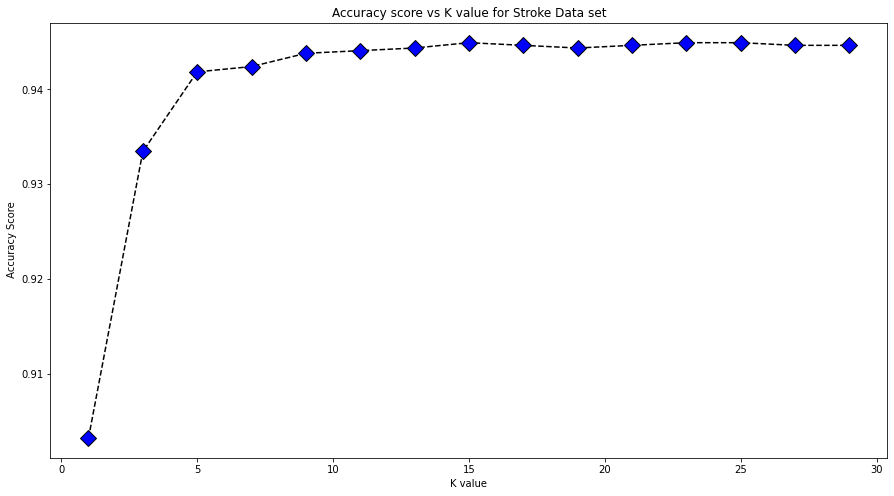

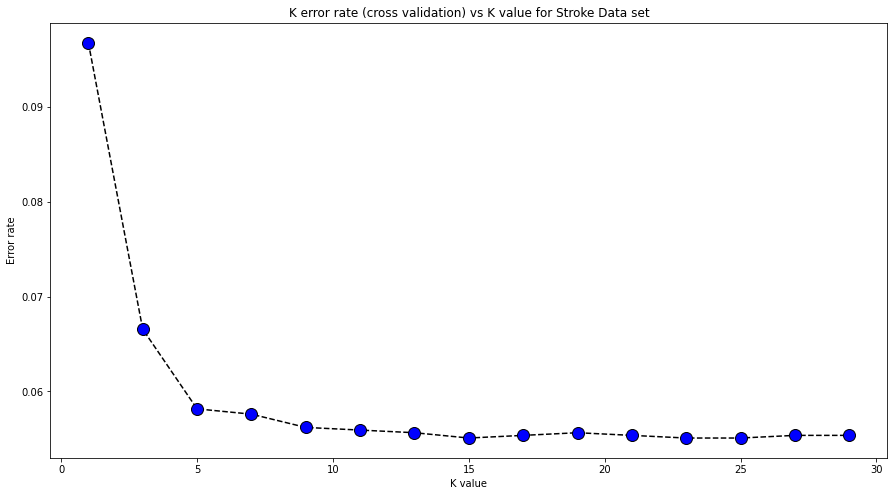

In [53]:
## KNN cross validation for K value
For_graph={}
cross_valscores_list=[]
error_rate_list = []
k_number=[]
for i in range(1,30,2):
    knn=KNeighborsClassifier(n_neighbors=i, weights= 'uniform', algorithm = 'auto')
    cross_val= cross_val_score(knn, x_train, y_train, cv=10, scoring = 'accuracy')
    cross_valscores_list.append(cross_val.mean())
    error_rate_list.append(1-cross_val.mean())
    cross_valscores_dictdata= (i,cross_val.mean(),1-cross_val.mean(),'Stroke')
    k_number.append(i)
    For_graph.setdefault('Stroke', []).append(cross_valscores_dictdata)



print (cross_valscores_list)

plt.figure(figsize=(15,8))
plt.plot(range(1,30,2), cross_valscores_list, color = 'black', linestyle='dashed', marker = 'D', markerfacecolor = 'blue', markersize = 12)

plt.title('Accuracy score vs K value for Stroke Data set')
plt.xlabel('K value')
plt.ylabel(' Accuracy Score')

print ("The maximum cross validation score is {} at K = {}".format(max(cross_valscores_list), k_number[cross_valscores_list.index(max(cross_valscores_list))]))

plt.figure(figsize=(15,8))
plt.plot(range(1,30,2), error_rate_list, color = 'black', linestyle='dashed', marker = 'o', markerfacecolor = 'blue', markersize = 12)

plt.title('K error rate (cross validation) vs K value for Stroke Data set')
plt.xlabel('K value')
plt.ylabel('Error rate')

print ("The minimum error rate is {} at K = {}".format(min(error_rate_list), k_number[error_rate_list.index(min(error_rate_list))]))

stroke_df=pd.DataFrame(For_graph)
#Diabetes_df
#Diabetes_df.to_excel('Diabetes_df.xlsx')
stroke_df.to_excel("stroke_df.xlsx",sheet_name='Sheet_name_1') 


uniform
The selected optimum K is: 23
[[1454    0]
 [  79    0]]


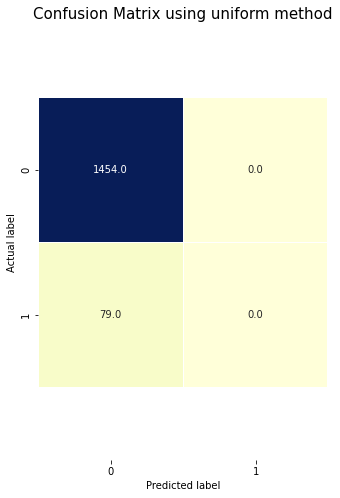

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1454
           1       0.00      0.00      0.00        79

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.90      0.95      0.92      1533

****
distance
The selected optimum K is: 23
[[1453    1]
 [  79    0]]


/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



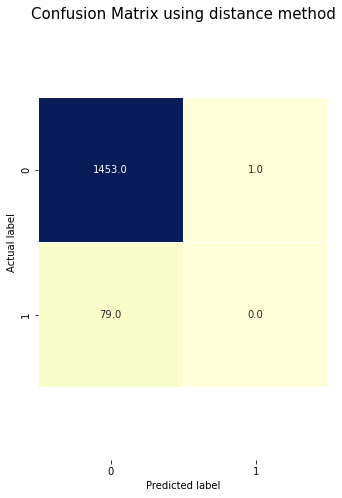

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1454
           1       0.00      0.00      0.00        79

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.90      0.95      0.92      1533

****


In [54]:
## selecting K  from cross validation
for weights in ["uniform", "distance"]:
    print (weights)
    selected_k= k_number[error_rate_list.index(min(error_rate_list))]
    print ('The selected optimum K is:',selected_k)
    knn_neighnour=KNeighborsClassifier(n_neighbors=selected_k, weights= weights, algorithm = 'auto')
    knn_neighnour.fit(x_train, y_train)
    y_predict = knn_neighnour.predict(x_test)
    print(confusion_matrix(y_test,y_predict))
    cm= confusion_matrix(y_test,y_predict)
    df = pd.DataFrame(cm, index= ['0', '1'], columns = ['0', '1'])
    
    plt.figure(figsize=(15,8))
    sns.heatmap(df, annot = True, cbar = False, fmt = '.1f', linewidths = .3, square = True, cmap='YlGnBu');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    plt.title('Confusion Matrix using {} method'.format(weights), size = 15 );
    b,t = plt.ylim()
    b += 0.5
    t-= 0.5
    plt.ylim(b,t)
    plt.show()
    
    
    
    print(classification_report(y_test,y_predict))  
    print ('*'*4)
    